<a href="https://colab.research.google.com/github/sdasmaha/Ml_Engineers_445/blob/master/ML_HW_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook Excercise #2
#Srinjoy DasMahapatra

IDE => Google Colab Pro

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df_iot_tel = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/BAJWA-ML/Notebook 2/iot_telemetry_dataset.csv")

# 1. Feature Engineering for _Environmental Sensor Telemetry Data_

## Problem 1.1

###(a)

From Videos ML

### (b)

In [4]:
df_iot_tel.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [5]:
print(df_iot_tel.shape) 

(405184, 9)


There are **405,184** data samples in the dataset.

### (c)



In [6]:
df_iot_tel['device'].dtypes

dtype('O')

We can see the MAC address is of datatype=> **O** (Object)

In [7]:
df_iot_tel['device'].where(df_iot_tel['device'] == '00:0f:00:70:91:0a').value_counts()

00:0f:00:70:91:0a    111815
Name: device, dtype: int64

There are **111,815** data samples with the MAC address 00:0f:00:70:91:0a 

### (d)

In [8]:
df_iot_tel['device'].where(df_iot_tel['device'] == '1c:bf:ce:15:ec:4d').value_counts()

1c:bf:ce:15:ec:4d    105918
Name: device, dtype: int64

There are **105,918** data samples with the MAC address 1c:bf:ce:15:ec:4d


### (e)

In [41]:
df_iot_tel['device'].where(df_iot_tel['device'] == 'b8:27:eb:bf:9d:51').value_counts()

b8:27:eb:bf:9d:51    187451
Name: device, dtype: int64

There are **187,451** data samples with the MAC address b8:27:eb:bf:9d:51

**Adding all the MAC addresses individually we get 405184.  Hence there is only 3 MAC addresses in total**

## Problem 1.2

In [9]:
df_iot_tel.dtypes

ts          float64
device       object
co          float64
humidity    float64
light          bool
lpg         float64
motion         bool
smoke       float64
temp        float64
dtype: object

 The problem mentions most of the challenges that otherwise needed to be worked on : 
 1.  No missing Entries
 2. pandas.get_dummies() can be used 


### (a)

**Device**

In [10]:
MAC_types = df_iot_tel['device']
dum_df = pd.get_dummies(MAC_types, prefix="MAC:" )
MAC_df = df_iot_tel.join(dum_df)
MAC_df = MAC_df.drop(columns = 'device')
MAC_df.head(5)

,ts,co,humidity,light,lpg,motion,smoke,temp,MAC:_00:0f:00:70:91:0a,MAC:_1c:bf:ce:15:ec:4d,MAC:_b8:27:eb:bf:9d:51
0,1.594512e+09,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,0,0,1
1,1.594512e+09,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,1,0,0
2,1.594512e+09,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,0,0,1
3,1.594512e+09,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,0,1,0
4,1.594512e+09,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,0,0,1


**Light**

In [11]:
light_types = MAC_df['light']
dum_df_light = pd.get_dummies(light_types, prefix="Light:" )
light_df = MAC_df.join(dum_df_light)
light_df = light_df.drop(columns = 'light')
light_df.head(5)

,ts,co,humidity,lpg,motion,smoke,temp,MAC:_00:0f:00:70:91:0a,MAC:_1c:bf:ce:15:ec:4d,MAC:_b8:27:eb:bf:9d:51,Light:_False,Light:_True
0,1.594512e+09,0.004956,51.000000,0.007651,False,0.020411,22.700000,0,0,1,1,0
1,1.594512e+09,0.002840,76.000000,0.005114,False,0.013275,19.700001,1,0,0,1,0
2,1.594512e+09,0.004976,50.900000,0.007673,False,0.020475,22.600000,0,0,1,1,0
3,1.594512e+09,0.004403,76.800003,0.007023,False,0.018628,27.000000,0,1,0,0,1
4,1.594512e+09,0.004967,50.900000,0.007664,False,0.020448,22.600000,0,0,1,1,0


**Motion**

In [12]:
motion_types = light_df['motion']
dum_df_motion = pd.get_dummies(motion_types, prefix="Motion:" )
motion_df = light_df.join(dum_df_motion)
motion_df = motion_df.drop(columns = 'motion')
one_hot_encoded_df = motion_df
one_hot_encoded_df.head(5)

,ts,co,humidity,lpg,smoke,temp,MAC:_00:0f:00:70:91:0a,MAC:_1c:bf:ce:15:ec:4d,MAC:_b8:27:eb:bf:9d:51,Light:_False,Light:_True,Motion:_False,Motion:_True
0,1.594512e+09,0.004956,51.000000,0.007651,0.020411,22.700000,0,0,1,1,0,1,0
1,1.594512e+09,0.002840,76.000000,0.005114,0.013275,19.700001,1,0,0,1,0,1,0
2,1.594512e+09,0.004976,50.900000,0.007673,0.020475,22.600000,0,0,1,1,0,1,0
3,1.594512e+09,0.004403,76.800003,0.007023,0.018628,27.000000,0,1,0,0,1,1,0
4,1.594512e+09,0.004967,50.900000,0.007664,0.020448,22.600000,0,0,1,1,0,1,0


### (b)

In [93]:
grouped = df_iot_tel.groupby(df_iot_tel.device)
device1 = grouped.get_group("00:0f:00:70:91:0a")
device2 = grouped.get_group("1c:bf:ce:15:ec:4d")
device3 = grouped.get_group("b8:27:eb:bf:9d:51")

In [89]:
device1.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
7,1.594512e+09,00:0f:00:70:91:0a,0.002938,76.000000,False,0.005241,False,0.013628,19.700001
15,1.594512e+09,00:0f:00:70:91:0a,0.002905,75.800003,False,0.005199,False,0.013509,19.700001
20,1.594512e+09,00:0f:00:70:91:0a,0.002938,75.800003,False,0.005241,False,0.013628,19.700001
23,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001


In [94]:
device1.iloc[:,np.r_[2,3,5,7,8]] = device1.iloc[:,np.r_[2,3,5,7,8]] - device1.iloc[:,np.r_[2,3,5,7,8]].mean()
device1.iloc[:,np.r_[2,3,5,7,8]] = device1.iloc[:,np.r_[2,3,5,7,8]] /  device1.iloc[:,np.r_[2,3,5,7,8]].std()
device2.iloc[:,np.r_[2,3,5,7,8]] = device2.iloc[:,np.r_[2,3,5,7,8]] - device2.iloc[:,np.r_[2,3,5,7,8]].mean()
device2.iloc[:,np.r_[2,3,5,7,8]] = device2.iloc[:,np.r_[2,3,5,7,8]]/  device2.iloc[:,np.r_[2,3,5,7,8]].std()
device3.iloc[:,np.r_[2,3,5,7,8]] = device3.iloc[:,np.r_[2,3,5,7,8]] - device3.iloc[:,np.r_[2,3,5,7,8]].mean()
device3.iloc[:,np.r_[2,3,5,7,8]] = device3.iloc[:,np.r_[2,3,5,7,8]]/  device3.iloc[:,np.r_[2,3,5,7,8]].std()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [69]:
avg = device1.mean()
stdv = device1.std()
standardized_device1 = (device1 - avg) / stdv
standardized_device1.head(5)


,3,4,5,7,8,co,device,humidity,light,lpg,motion,smoke,temp,ts
1,NaN,NaN,NaN,NaN,NaN,-0.464451,NaN,0.281222,-0.182601,-0.458333,-0.00518,-0.460392,0.524162,-1.737234
7,NaN,NaN,NaN,NaN,NaN,-0.398156,NaN,0.281222,-0.182601,-0.383561,-0.00518,-0.387058,0.524162,-1.737173
15,NaN,NaN,NaN,NaN,NaN,-0.420542,NaN,0.179999,-0.182601,-0.408731,-0.00518,-0.411758,0.524162,-1.737093
20,NaN,NaN,NaN,NaN,NaN,-0.398156,NaN,0.179999,-0.182601,-0.383561,-0.00518,-0.387058,0.524162,-1.737050
23,NaN,NaN,NaN,NaN,NaN,-0.464451,NaN,0.281222,-0.182601,-0.458333,-0.00518,-0.460392,0.524162,-1.737031


In [70]:
standardized_device1.mean()

3                    NaN
4                    NaN
5                    NaN
7                    NaN
8                    NaN
co         -9.287036e-13
device               NaN
humidity    1.240455e-14
light       2.039881e-14
lpg         1.560453e-16
motion     -3.222828e-15
smoke      -4.403732e-14
temp        7.877475e-16
ts         -8.911983e-11
dtype: float64

In [71]:
standardized_device1.var()

3           NaN
4           NaN
5           NaN
7           NaN
8           NaN
co          1.0
device      NaN
humidity    1.0
light       1.0
lpg         1.0
motion      1.0
smoke       1.0
temp        1.0
ts          1.0
dtype: float64

In [73]:
avg2 = device2.mean()
stdv2 = device2.std()
standardized_device2 = (device1 - avg2) / stdv2
standardized_device2.head(5)

,3,4,5,7,8,co,device,humidity,light,lpg,motion,smoke,temp,ts
1,NaN,NaN,NaN,NaN,NaN,-4.190906,NaN,-6.889934,-inf,-1246.789007,-0.056328,-453.288789,-12.584391,-1.734001
7,NaN,NaN,NaN,NaN,NaN,-3.884962,NaN,-6.889934,-inf,-1046.348375,-0.056328,-383.787456,-12.584391,-1.733940
15,NaN,NaN,NaN,NaN,NaN,-3.988270,NaN,-6.901250,-inf,-1113.821466,-0.056328,-407.196231,-12.584391,-1.733860
20,NaN,NaN,NaN,NaN,NaN,-3.884962,NaN,-6.901250,-inf,-1046.348375,-0.056328,-383.787456,-12.584391,-1.733817
23,NaN,NaN,NaN,NaN,NaN,-4.190906,NaN,-6.889934,-inf,-1246.789007,-0.056328,-453.288789,-12.584391,-1.733798


In [74]:
avg3 = device3.mean()
stdv3 = device3.std()
standardized_device3 = (device3 - avg3) / stdv3
standardized_device3.head(5)

,co,device,humidity,light,lpg,motion,smoke,temp,ts
0,-1.080793,NaN,0.098428,-0.127554,-1.093491,-0.027727,-1.091260,0.871610,-1.732015
2,-1.044864,NaN,0.045488,-0.127554,-1.056107,-0.027727,-1.054137,0.664099,-1.731996
4,-1.060344,NaN,0.045488,-0.127554,-1.072209,-0.027727,-1.070127,0.664099,-1.731978
6,-1.044841,NaN,0.045488,-0.127554,-1.056083,-0.027727,-1.054113,0.664099,-1.731959
9,-1.055167,NaN,0.045488,-0.127554,-1.066824,-0.027727,-1.064779,0.664099,-1.731941


### (c)

In [82]:
df_final = standardized_device1.agg(standardized_device2)

AttributeError: ignored

### (d)

ts variable in the dataset has not been touched during pre processing because it represents the the time series data and timestamps 

_Your answer for 1.2d goes here_

### (e)

In [49]:
device1 = one_hot_encoded_df['MAC:_00:0f:00:70:91:0a'] == 1
device2 = one_hot_encoded_df['MAC:_1c:bf:ce:15:ec:4d'] == 1
device3 = one_hot_encoded_df['MAC:_b8:27:eb:bf:9d:51'] == 1

In [50]:
mean_co = [one_hot_encoded_df.loc[device1,'co'].mean(),one_hot_encoded_df.loc[device2,'co'].mean(),one_hot_encoded_df.loc[device2,'co'].mean()]
mean_humidity = [one_hot_encoded_df.loc[device1,'humidity'].mean(),one_hot_encoded_df.loc[device2,'humidity'].mean(),one_hot_encoded_df.loc[device3,'humidity'].mean()]
mean_lpg = [one_hot_encoded_df.loc[device1,'lpg'].mean(),one_hot_encoded_df.loc[device2,'lpg'].mean(),one_hot_encoded_df.loc[device3,'lpg'].mean()]
mean_smoke = [one_hot_encoded_df.loc[device1,'smoke'].mean(),one_hot_encoded_df.loc[device2,'smoke'].mean(),one_hot_encoded_df.loc[device3,'smoke'].mean()]
mean_temp = [one_hot_encoded_df.loc[device1,'temp'].mean(),one_hot_encoded_df.loc[device2,'temp'].mean(),one_hot_encoded_df.loc[device3,'temp'].mean()]

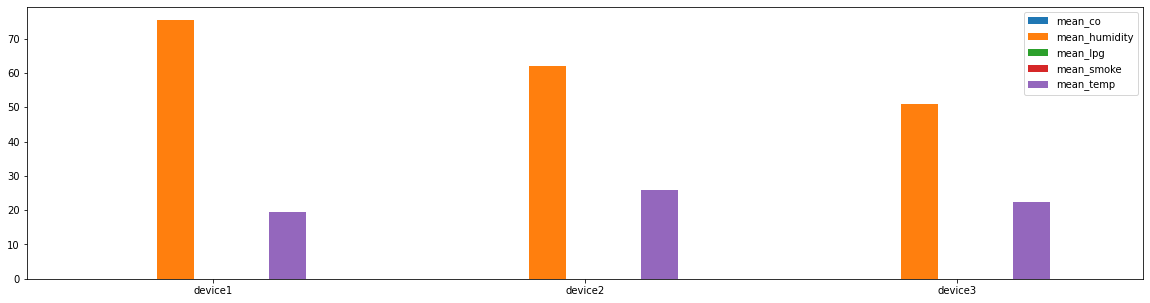

In [60]:
index = ['device1','device2','device3']
df = pd.DataFrame({'mean_co': mean_co,'mean_humidity': mean_humidity, 'mean_lpg': mean_lpg, 'mean_smoke': mean_smoke, 'mean_temp':mean_temp}, index = index)
ax = df.plot.bar(rot=0,figsize=(20,5))


In [84]:
var_co = [one_hot_encoded_df.loc[device1,'co'].var(),one_hot_encoded_df.loc[device2,'co'].var(),one_hot_encoded_df.loc[device2,'co'].var()]
var_humidity = [one_hot_encoded_df.loc[device1,'humidity'].var(),one_hot_encoded_df.loc[device2,'humidity'].var(),one_hot_encoded_df.loc[device3,'humidity'].var()]
var_lpg = [one_hot_encoded_df.loc[device1,'lpg'].var(),one_hot_encoded_df.loc[device2,'lpg'].var(),one_hot_encoded_df.loc[device3,'lpg'].var()]
var_smoke = [one_hot_encoded_df.loc[device1,'smoke'].var(),one_hot_encoded_df.loc[device2,'smoke'].var(),one_hot_encoded_df.loc[device3,'smoke'].var()]
var_temp = [one_hot_encoded_df.loc[device1,'temp'].var(),one_hot_encoded_df.loc[device2,'temp'].var(),one_hot_encoded_df.loc[device3,'temp'].var()]

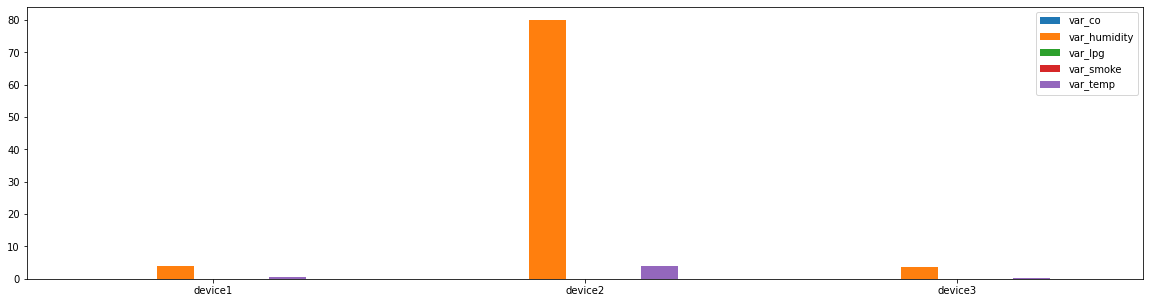

In [86]:
index2 = ['device1','device2','device3']
df2 = pd.DataFrame({'var_co': var_co,'var_humidity': var_humidity, 'var_lpg': var_lpg, 'var_smoke': var_smoke, 'var_temp':var_temp}, index = index)
ax2 = df2.plot.bar(rot=0,figsize=(20,5))

In [ ]:
**Variance of the five independent variables**

## Problem 1.3

In [ ]:
# Code of 1.3 goes here

# 2. Feature Learning for _Synthetically Generated Data_

## Problem 2.1

### (a)

In [102]:
A = np.random.randn(3,2)
print(A)

[[-1.43425646  0.56096121]
 [-0.58661663 -1.03684866]
 [-0.86259734  0.07669609]]


### (b)

In [103]:
np.linalg.matrix_rank(A, tol=None)

2

### (c)

In [104]:
np.linalg.norm(A)

2.1309386994893353

In [105]:
a = A[0]; print(a)
b = A[1]; print(b)
c = A[2]; print(c)

[-1.43425646  0.56096121]
[-0.58661663 -1.03684866]
[-0.86259734  0.07669609]


In [106]:
print(np.inner(a,b));
print(np.inner(a,c));
print(np.inner(b,c));

0.25972680447319174
1.2802093378127872
0.42649170481442705


### (d)

Show if this belongs to the subspace corresponding to the column space of A


In [107]:
x1 = np.random.random(2);
x2 = np.random.random(2);
x3 = np.random.random(2);
print(x1);
print(x2);
print(x3);

[0.52618588 0.76903184]
[0.72709974 0.12958139]
[0.74143287 0.09876147]



 We see that the vectors x1, x2 and x3 are closed under addition and 
scalar multiplication hence they belong to the same subspace S.

## Problem 2.2

###(a)

In [108]:
b = np.random.randn(2,250)

In [109]:
x = A@b

In [112]:
print(x)

[[ 2.07073129e+00 -4.45911735e-01 -5.18080352e-01 -1.18971073e+00
  -1.48247322e+00 -9.95120293e-01  3.65201640e-01 -8.20660780e-01
   2.65900112e-01  1.12779804e+00  6.89188920e-01 -6.90943108e-01
   3.70651330e+00  1.20244765e+00 -4.34198212e-01 -1.02976991e-01
  -6.01620579e-01  1.48439763e+00 -2.65722624e+00 -3.47210244e-01
   1.23662804e+00  3.03114702e+00 -8.85298171e-01 -2.91578051e+00
   1.48563805e+00  2.23012117e+00 -1.34943001e+00 -7.52302192e-01
  -2.21020147e-01  1.12418718e+00 -1.99933684e+00  2.49908863e-01
   2.28038053e-01  1.19611807e+00  5.43563242e-01  4.32444272e-01
  -1.00421459e+00  3.09209578e-02  1.55482334e+00 -2.49179056e-01
  -2.09607545e+00  1.75702087e+00  1.02195503e+00  7.27730368e-01
   3.05229955e-01 -7.49254584e-01  5.37776466e-01  2.99477757e-01
  -1.50339483e-01  1.83397512e+00 -1.64698538e+00  4.13377918e+00
  -1.70231081e+00  4.43098090e-02 -3.79490164e-01 -2.18645716e+00
  -8.04748228e-01 -7.98041025e-01  1.75673169e+00  8.78288576e-01
   5.73538

We can clearly see the data samples when printed are in not a data matrix format when we decide to print a data sample. Hence we save it in data matrix **R** nxp format.

###(b)

Yes, kinda, watch ML videos

###(c)

In [123]:
X = x

In [124]:
print(X.shape);

(3, 250)


n = 3
p = 250

###(d)

In [125]:
np.linalg.matrix_rank(X, tol=None)

2

## Problem 2.3

###(a)

In [116]:
SVD = np.linalg.svd(X)
np.shape(SVD);

In [117]:
print(SVD)

(array([[-0.84615574,  0.2824697 , -0.45191961],
       [-0.22371217, -0.95791436, -0.17986925],
       [-0.48370789, -0.05109748,  0.87373664]]), array([2.74450442e+01, 1.88813368e+01, 1.84379310e-15]), array([[-6.11703048e-02,  1.81598043e-02,  1.07194867e-02, ...,
        -8.19355946e-02, -1.22518245e-01, -1.23007045e-02],
       [ 1.21908348e-01, -4.53566905e-03, -5.04638272e-02, ...,
         2.51012174e-02, -2.61594350e-02, -3.53514975e-02],
       [ 5.63308071e-01,  3.97301978e-01,  2.31836756e-02, ...,
        -7.74132613e-02,  1.24950604e-01,  1.31360708e-02],
       ...,
       [-1.74111086e-02,  5.42963384e-02,  1.18780640e-01, ...,
         9.84642450e-01,  5.30523163e-03,  9.27206886e-04],
       [-1.57308636e-01,  2.71031743e-02, -9.00111847e-02, ...,
        -1.85333277e-03,  9.73955471e-01, -3.80673014e-03],
       [-1.41848943e-02,  2.65583742e-02, -2.71958970e-02, ...,
         1.84811333e-03, -5.46195310e-03,  9.98301382e-01]]))


In [118]:
X_T = np.transpose(X)
print(X_T[0,:3])
print(X_T[:3,0])

[ 2.07073129 -1.82934731  0.69444352]
[ 2.07073129 -0.44591173 -0.51808035]


In [120]:
XT_X = X_T@X

In [121]:
print(XT_X)

[[ 8.11669147 -1.03384345 -2.68710836 ...  4.86613211  4.50815621
  -0.96964954]
 [-1.03384345  0.25573333  0.2282261  ... -1.16134585 -1.63356848
  -0.11109245]
 [-2.68710836  0.2282261   0.99442631 ... -1.11315394 -0.51861823
   0.53667579]
 ...
 [ 4.86613211 -1.16134585 -1.11315394 ...  5.28139213  7.32729006
   0.44280484]
 [ 4.50815621 -1.63356848 -0.51861823 ...  7.32729006 11.55049367
   1.4648509 ]
 [-0.96964954 -0.11109245  0.53667579 ...  0.44280484  1.4648509
   0.55950355]]


In [122]:
vectors = np.linalg.eigh(EVD)
print(eigen_values)

NameError: ignored

Since we know the singular values σ1,…, σn of X are the nonnegative square roots of the eigenvalues of the symmetric positive semidefinite matrix ((X^T)X) and the right singular vectors are the eigenvectors of the matrix ((X^T)X)

We can clearly see there is 2 arrays in total. From here we conclude 1 of the array is eigen vectors array and another is singular vectors array!

## Problem 2.4


In [ ]:
# please structure your code and markdown cells in a similar fashion to 2.1